# Indian Economy: Exploration through Data Visulaisation (1960-2020)

### Prepared by:
- **Name**: Kavyansh Jain

--------

### **Project Overview**

As India is progressing towards a economic power, let's dive in the past of the Indian Economic from the timeline of 1960-2020. This project aims to visualise the curves and data how the economy of India has tranformed within this timeline.

This project aims to:

1. Conduct the through screening of dataset for errors.
2. Indentifying key ascepts and their relations.
3. Visualise the patterns and other attributes for better insights and understanding.


-------


### **Dataset Metadata**

#### **Source**

Indian Economy Dataset is taken form this [kaggle dataset](https://www.kaggle.com/datasets/nejilee/indian-economy-from-1960-to-2020)

#### **Number of Rows and Coloumns**

- **Rows:** 61
- **Columns:** 12 (initial)
- **Columns:** 17 (after data cleaning and exploration)

#### **Column Descriptions**

| Column | Description |
|---|---|
| Year | The relevant year of the data |
| GDP (current US$)| Total GDP of the nation in the year |
| GDP per capita (current US$)| GDP per capita in the year |
| GDP growth (annual %)| GDP annual growth rate throughout the year |
| Imports of goods and services (% of GDP)| Percentage Contribution of the Imports in GDP |
| Exports of goods and services (% of GDP)| Percentage Contribution of the Exports in GDP |
| Total reserves (includes gold, current US$)| Total Reserves of the country in the year |
| Inflation, consumer prices (annual %)| Inflation on the consumer market in the year |
| Population, total| Tota Population of the nation in the year |
| Population growth (annual %)| Growth rate of Population in the year |
| Life expectancy at birth, total (years)| Life expectancy at the birth of the citizens of the nation throughout the year|
| Imports (in USD)| Amount of Imports in USD in the year|
| Exports (in USD)| Amount of Exports in USD in the year|
| Trade Balance (in USD)| Amount of trade Deficit/Surplus of the year|
| Economic Openness (in USD)| Economic openness on the terms of export and import of the year|
| Reserves to GDP| Ratio of reserves to GDP for economic indicators purpose|
| Decade| The data is of which decade|


---


### **Notebook Contents**


# 1. Load the Dataset and Relevant Libraries

We have locally downloaded the dataset for the use in the jupyter notebook.
we are going to use this following libraries: Numpy, Pandas, Matplotlib and Seaborn

In [35]:
#importing neccessary libraries and Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 61)
plt.style.use('seaborn-v0_8')
df = pd.read_csv('indianEco.csv')

# 2. Checking Data and Data processing

Inspecting and processing of data

1. First check our data and then drop the rows and coloums with null values and clean it.

2. Use the already given attributes to calculate new attributes for better data understanding and processing in the visualisation.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           61 non-null     int64  
 1   Country Name                                   61 non-null     object 
 2   GDP (current US$)                              61 non-null     float64
 3    GDP per capita (current US$)                  61 non-null     int64  
 4   GDP growth (annual %)                          61 non-null     float64
 5   Imports of goods and services (% of GDP)       61 non-null     float64
 6   Exports of goods and services (% of GDP)       61 non-null     float64
 7    Total reserves (includes gold, current US$)   61 non-null     float64
 8   Inflation, consumer prices (annual %)          61 non-null     float64
 9   Population, total                              61 non-nu

In [37]:
# As column names are with unnecessary space we will clean it
df.columns = df.columns.str.strip()

# As country name is repeating we will drop it for minimalisation
df = df.drop('Country Name', axis=1)

In [38]:
# Calculating other attributes for more informative data in the dataframe with other variables for the visualisation

df['Imports (in USD)'] = (df['Imports of goods and services (% of GDP)'] / 100) * df['GDP (current US$)']
df['Exports (in USD)'] = (df['Exports of goods and services (% of GDP)'] / 100) * df['GDP (current US$)']
df['Trade Balance (in USD)'] = df['Exports (in USD)'] - df['Imports (in USD)']
df['Economic Openness (in USD)'] = df['Imports (in USD)'] + df['Exports (in USD)']

# Other calculated columns
df['Reserves to GDP'] = (df['Total reserves (includes gold, current US$)'] / df['GDP (current US$)']) * 100
df['Decade'] = (df['Year'] // 10) * 10

crisis_years = {
    1965: "Indo-Pak War",
    1971: "Bangladesh War", 
    1979: "Oil Crisis",
    1991: "Economic Crisis",
    2008: "Global Financial Crisis",
    2020: "COVID-19 Pandemic"
}


In [39]:
#Final dataset
df

,Year,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)",Imports (in USD),Exports (in USD),Trade Balance (in USD),Economic Openness (in USD),Reserves to GDP,Decade
0,1960,37029883876.18,82,0.00,6.83,4.46,674536630.93,1.78,445954579,2.31,41.13,2529141068.74,1651532820.88,-877608247.87,4180673889.62,1.82,1960
1,1961,39232435784.04,85,3.72,5.96,4.30,666357094.86,1.70,456351876,2.33,41.74,2338253172.73,1686994738.71,-651258434.02,4025247911.44,1.70,1960
2,1962,42161481858.08,90,2.93,6.03,4.17,512791844.00,3.63,467024193,2.34,42.34,2542337356.04,1758133793.48,-784203562.56,4300471149.52,1.22,1960
3,1963,48421923459.12,101,5.99,5.91,4.28,607862500.36,2.95,477933619,2.34,42.94,2861735676.43,2072458324.05,-789277352.38,4934194000.48,1.26,1960
4,1964,56480289940.99,116,7.45,5.69,3.73,499145125.79,13.36,489059309,2.33,43.57,3213728497.64,2106714814.80,-1107013682.84,5320443312.44,0.88,1960
5,1965,59554854575.81,119,-2.64,5.21,3.31,600850886.23,9.47,500114346,2.26,44.20,3102807923.40,1971265686.46,-1131542236.94,5074073609.86,1.01,1960
6,1966,45865462034.29,90,-0.06,6.67,4.14,609694584.53,10.80,510992617,2.18,44.84,3059226317.69,1898830128.22,-1160396189.47,4958056445.91,1.33,1960
7,1967,50134942204.00,96,7.83,5.95,4.03,663764119.79,13.06,521987069,2.15,45.47,2983029061.14,2020438170.82,-962590890.32,5003467231.96,1.32,1960
8,1968,53085455870.67,100,3.39,4.94,4.04,730352744.87,3.24,533431909,2.19,46.10,2622421520.01,2144652417.18,-477769102.84,4767073937.19,1.38,1960
9,1969,58447995017.33,108,6.54,4.03,3.71,927764119.79,-0.58,545314670,2.23,46.75,2355454199.20,2168420615.14,-187033584.06,4523874814.34,1.59,1960


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         61 non-null     int64  
 1   GDP (current US$)                            61 non-null     float64
 2   GDP per capita (current US$)                 61 non-null     int64  
 3   GDP growth (annual %)                        61 non-null     float64
 4   Imports of goods and services (% of GDP)     61 non-null     float64
 5   Exports of goods and services (% of GDP)     61 non-null     float64
 6   Total reserves (includes gold, current US$)  61 non-null     float64
 7   Inflation, consumer prices (annual %)        61 non-null     float64
 8   Population, total                            61 non-null     int64  
 9   Population growth (annual %)                 61 non-null     float64
 10  Life

In [45]:
# Final overview of the data

print("Shape of the dataset:", df.shape)

print("\nColumns in the dataset:\n", df.columns)

# Check for missing values

print("\nMissing values in each column:\n", df.isnull().sum())

# Data types and summary statistics

print("\nData types:\n", df.dtypes)


Shape of the dataset: (61, 17)

Columns in the dataset:
 Index(['Year', 'GDP (current US$)', 'GDP per capita (current US$)',
       'GDP growth (annual %)', 'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Total reserves (includes gold, current US$)',
       'Inflation, consumer prices (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Life expectancy at birth, total (years)', 'Imports (in USD)',
       'Exports (in USD)', 'Trade Balance (in USD)',
       'Economic Openness (in USD)', 'Reserves to GDP', 'Decade'],
      dtype='object')

Missing values in each column:
 Year                                           0
GDP (current US$)                              0
GDP per capita (current US$)                   0
GDP growth (annual %)                          0
Imports of goods and services (% of GDP)       0
Exports of goods and services (% of GDP)       0
Total reserves (includes gold, current US$)    

# 3. Visualising the Data

The visualisation has been divided into this parts

### 1. Time Series Visualisation
Visualising Economy throughout the year form 1960 to 2020.
### 3. Correlation and Relationship Analysis
Visual representation of Correalation and relations between different indicators and attributes for better info of the economic's dynamics.
### 4. Comparitive and Distribution Analysis
Comparing attributes to understand their similarities and differences, focusing on how data is spread across different groups or conditions visually.
### 5. Crisis Impact Analysis
The impact of major events throughout the timeline on the economy of the country understood visually.

## 1. Time Series Visualisation 

1. Growth of the GDP Total, GDP per Capita over time and GDP growth Volatility.

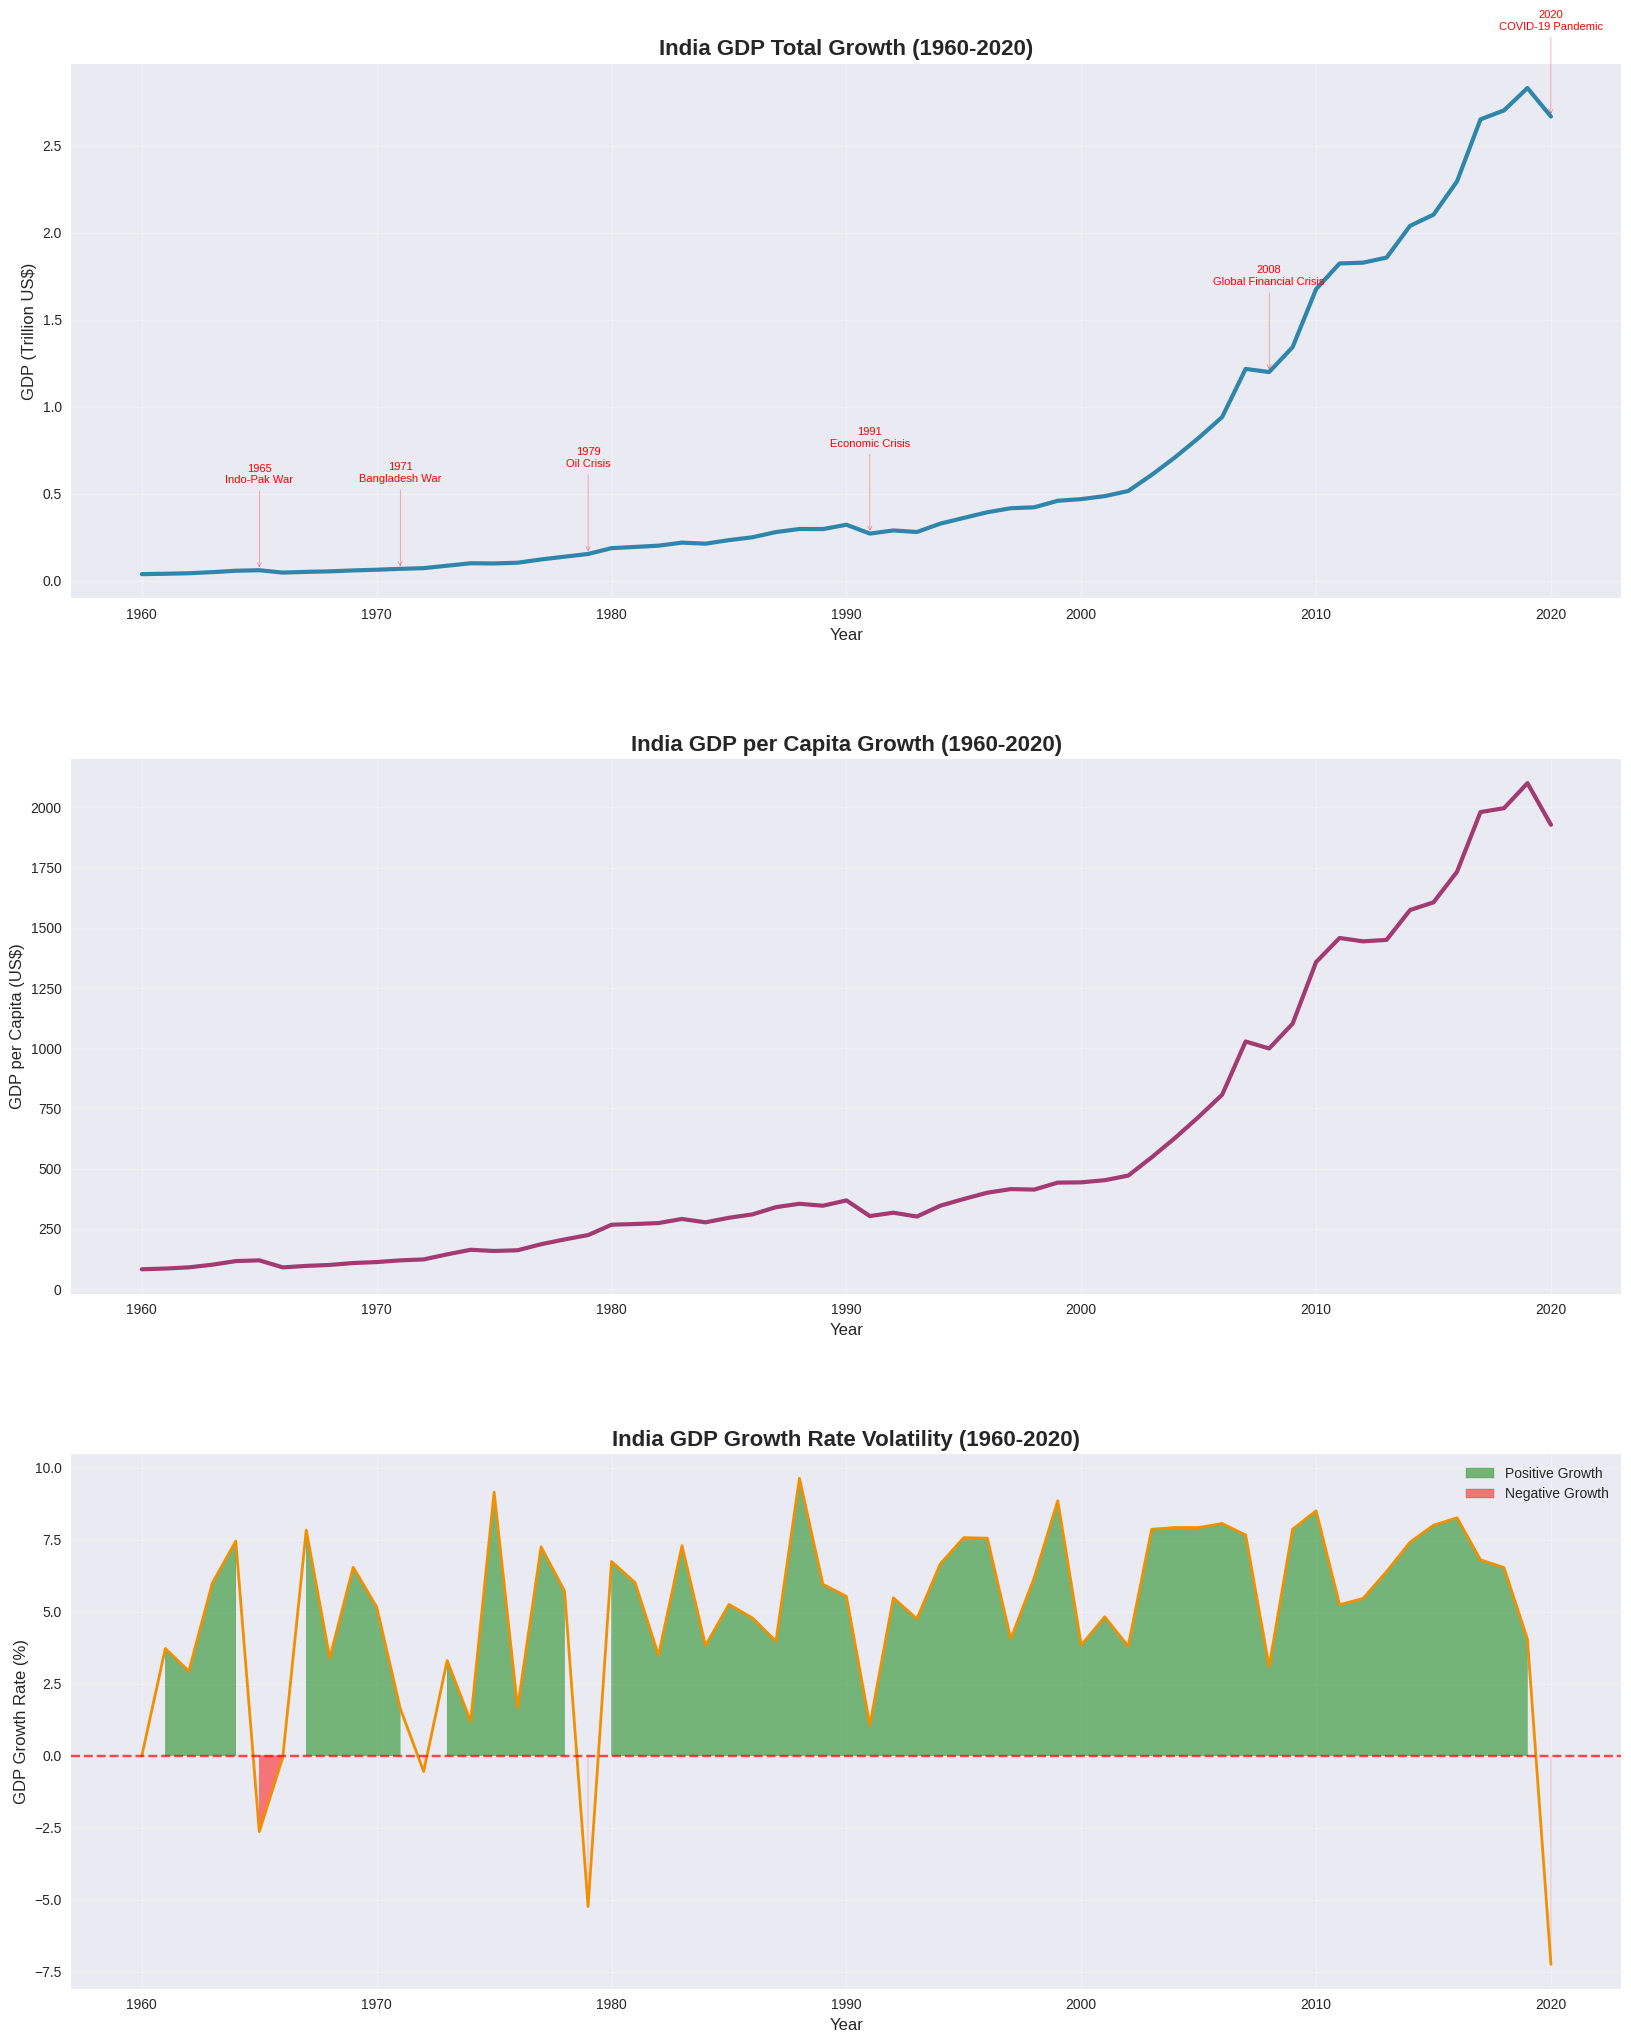

In [62]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3,1 ,figsize=(20, 25))
fig.subplots_adjust(hspace=0.3)

# GDP over time
ax1.plot(df['Year'], df['GDP (current US$)'] / 1e12, linewidth=3, color='#2E86AB')
ax1.set_title('India GDP Total Growth (1960-2020)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('GDP (Trillion US$)', fontsize=12)
ax1.grid(True, alpha=0.3)
for year, event in crisis_years.items():
    if year in df['Year'].values:
        gdp_val = df[df['Year'] == year]['GDP (current US$)'].iloc[0] / 1e12
        ax1.annotate(f'{year}\n{event}', xy=(year, gdp_val), 
                    xytext=(year, gdp_val + 0.5),
                    arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                    fontsize=8, ha='center', color='red')

# GDP per capita over time
ax2.plot(df['Year'], df['GDP per capita (current US$)'], linewidth =3, color='#A23B72')
ax2.set_title('India GDP per Capita Growth (1960-2020)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('GDP per Capita (US$)', fontsize=12)
ax2.grid(True, alpha=0.3)


# GDP Growth Rate with volatility
ax3.plot(df['Year'], df['GDP growth (annual %)'], linewidth=2, color='#F18F01')
ax3.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax3.fill_between(df['Year'], df['GDP growth (annual %)'], 0, 
                where=(df['GDP growth (annual %)'] > 0), alpha=0.5, color='green', label='Positive Growth')
ax3.fill_between(df['Year'], df['GDP growth (annual %)'], 0, 
                where=(df['GDP growth (annual %)'] < 0), alpha=0.5, color='red', label='Negative Growth')
ax3.set_title('India GDP Growth Rate Volatility (1960-2020)', fontsize=16, fontweight='bold')
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('GDP Growth Rate (%)', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)


plt.savefig('India GDP growth and GDP per captia relation', dpi=300)
plt.show(fig)


2. Population Dynamics, showing the life expectancy and population growth of the country

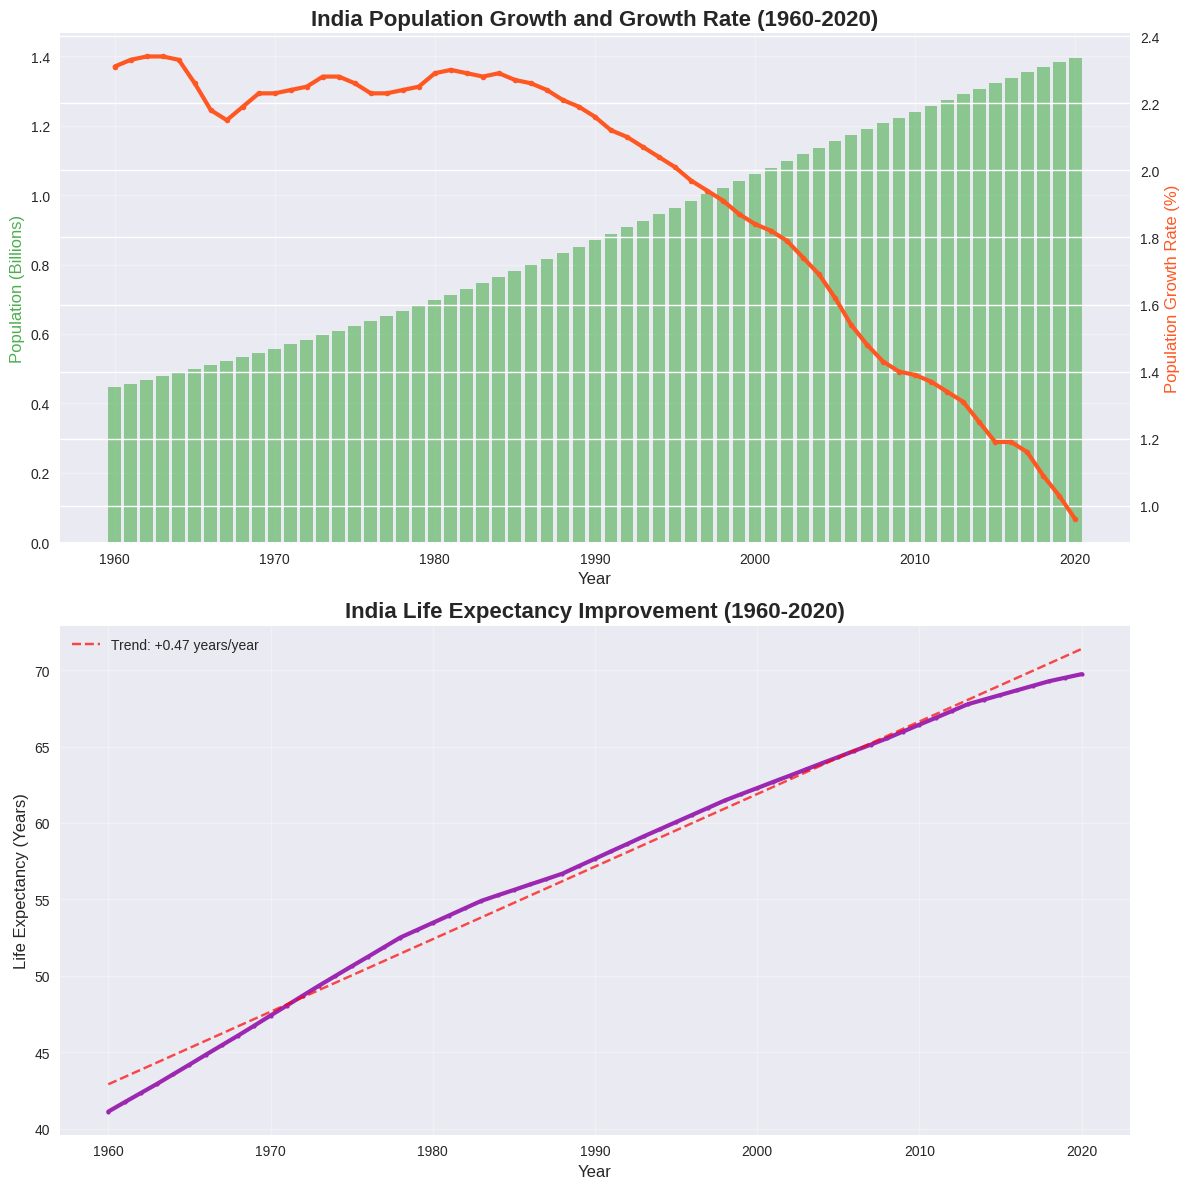

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
fig.subplots_adjust(hspace=0.3)
# Population growth
ax1_twin = ax1.twinx()
bars = ax1.bar(df['Year'], df['Population, total'] / 1e9, alpha=0.6, color='#4CAF50', width=0.8)
line = ax1_twin.plot(df['Year'], df['Population growth (annual %)'], 
                     color='#FF5722', linewidth=3, marker='o', markersize=4)

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Population (Billions)', fontsize=12, color='#4CAF50')
ax1_twin.set_ylabel('Population Growth Rate (%)', fontsize=12, color='#FF5722')
ax1.set_title('India Population Growth and Growth Rate (1960-2020)', fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Life expectancy trend
ax2.plot(df['Year'], df['Life expectancy at birth, total (years)'], 
         linewidth=3, color='#9C27B0', marker='o', markersize=3)
ax2.set_title('India Life Expectancy Improvement (1960-2020)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Life Expectancy (Years)', fontsize=12)
ax2.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Year'], df['Life expectancy at birth, total (years)'], 1)
p = np.poly1d(z)
ax2.plot(df['Year'], p(df['Year']), "--", alpha=0.7, color='red', 
         label=f'Trend: +{z[0]:.2f} years/year')
ax2.legend()

plt.tight_layout()
plt.savefig('Population Dynamics', dpi=300)
plt.show()


## 2. Correlation and Realtionship Analysis 

1. Development Indicators Matrix - Scatter plot matrix comparing GDP per capita, life expectancy, and population growth rate
2. Economic Openness vs Growth - Scatter plot of trade openness (imports + exports as % of GDP) vs GDP growth rate with different colors for different decades
3. Inflation vs Growth Trade-off - Scatter plot showing the relationship between inflation and GDP growth with point sizes representing GDP per capita

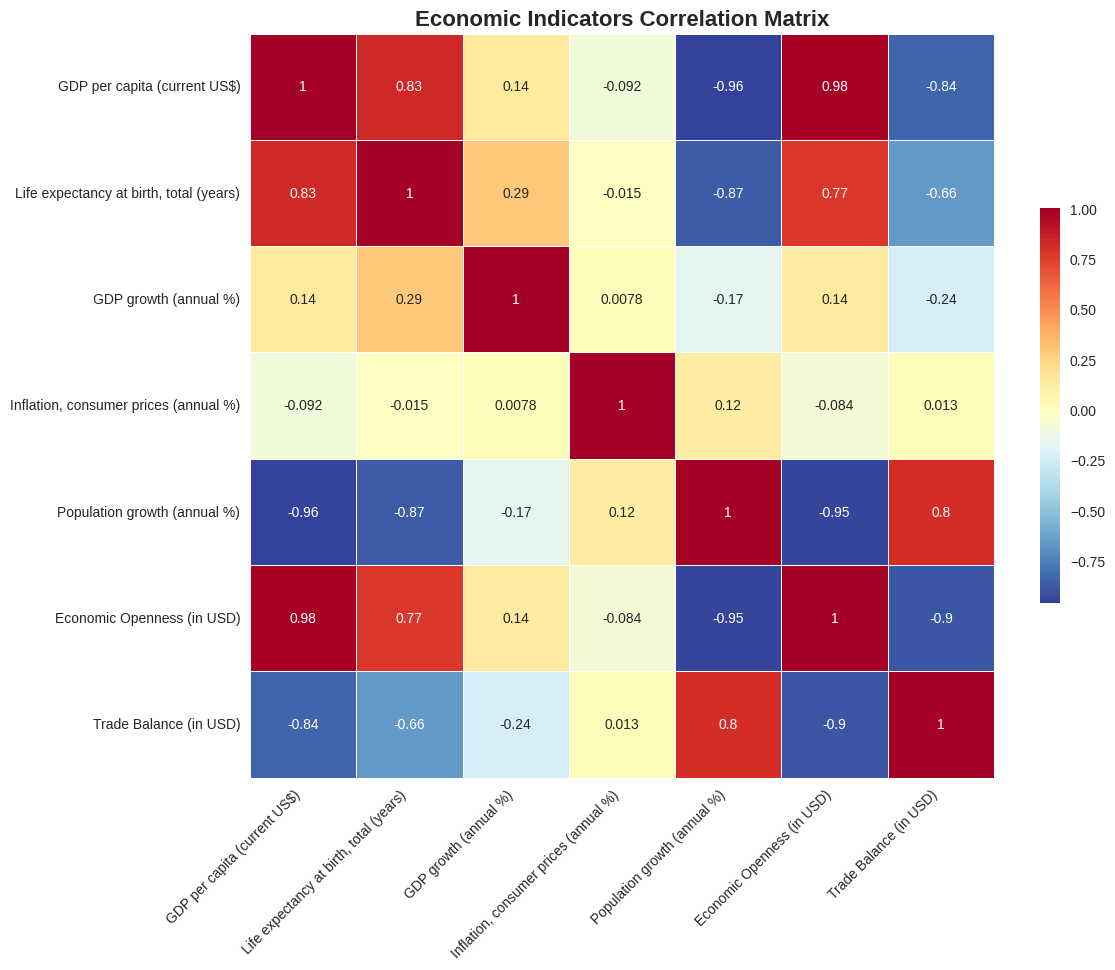

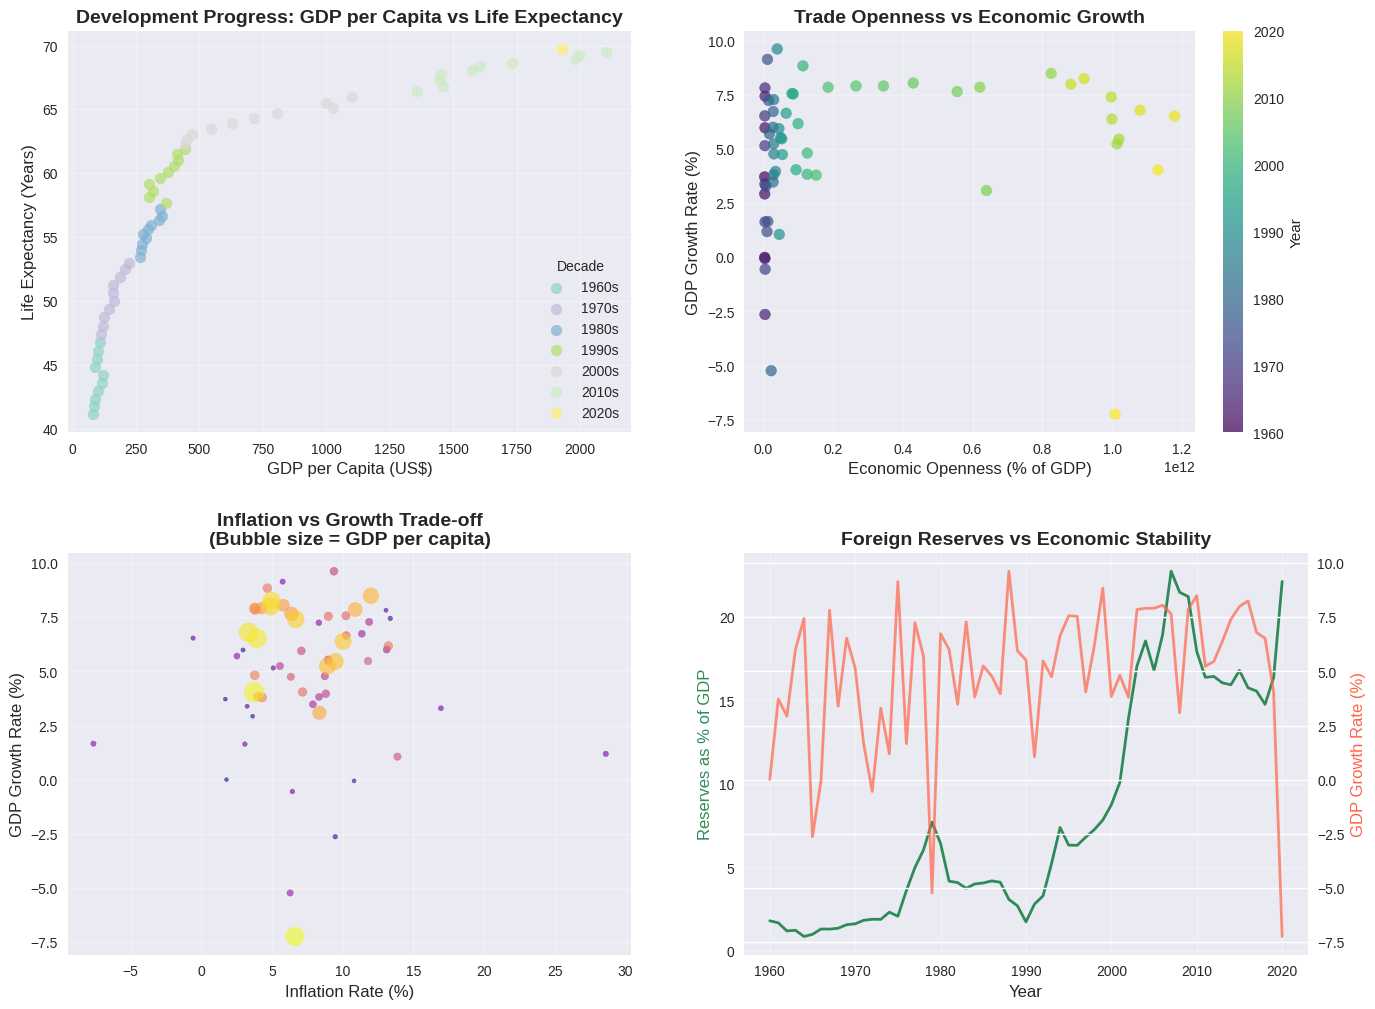

In [63]:
# 3.1 Development Indicators Correlation Matrix
plt.figure(figsize=(12, 10))

# Select key economic indicators
indicators = ['GDP per capita (current US$)', 'Life expectancy at birth, total (years)', 
              'GDP growth (annual %)', 'Inflation, consumer prices (annual %)',
              'Population growth (annual %)', 'Economic Openness (in USD)', 'Trade Balance (in USD)']

corr_matrix = df[indicators].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Economic Indicators Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 3.2 Economic Development Scatter Plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

fig.subplots_adjust(hspace=0.3)

# GDP per capita vs Life Expectancy (colored by decade)
decades = df['Decade'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(decades)))

for i, decade in enumerate(sorted(decades)):
    decade_data = df[df['Decade'] == decade]
    ax1.scatter(decade_data['GDP per capita (current US$)'], 
               decade_data['Life expectancy at birth, total (years)'],
               c=[colors[i]], label=f'{decade}s', alpha=0.7, s=60)

ax1.set_xlabel('GDP per Capita (US$)', fontsize=12)
ax1.set_ylabel('Life Expectancy (Years)', fontsize=12)
ax1.set_title('Development Progress: GDP per Capita vs Life Expectancy', fontsize=14, fontweight='bold')
ax1.legend(title='Decade')
ax1.grid(True, alpha=0.3)

# Economic Openness vs GDP Growth
ax2.scatter(df['Economic Openness (in USD)'], df['GDP growth (annual %)'], 
           c=df['Year'], cmap='viridis', alpha=0.7, s=60)
ax2.set_xlabel('Economic Openness (% of GDP)', fontsize=12)
ax2.set_ylabel('GDP Growth Rate (%)', fontsize=12)
ax2.set_title('Trade Openness vs Economic Growth', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
cbar2 = plt.colorbar(ax2.collections[0], ax=ax2)
cbar2.set_label('Year')

# Inflation vs Growth Trade-off
sizes = (df['GDP per capita (current US$)'] / df['GDP per capita (current US$)'].max()) * 200
ax3.scatter(df['Inflation, consumer prices (annual %)'], df['GDP growth (annual %)'],
           s=sizes, alpha=0.6, c=df['Year'], cmap='plasma')
ax3.set_xlabel('Inflation Rate (%)', fontsize=12)
ax3.set_ylabel('GDP Growth Rate (%)', fontsize=12)
ax3.set_title('Inflation vs Growth Trade-off\n(Bubble size = GDP per capita)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Reserves vs Economic Stability
ax4.plot(df['Year'], df['Reserves to GDP'], linewidth=2, color='#2E8B57', label='Reserves/GDP')
ax4_twin = ax4.twinx()
ax4_twin.plot(df['Year'], df['GDP growth (annual %)'], 
              linewidth=2, color='#FF6347', alpha=0.7, label='GDP Growth')
ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel('Reserves as % of GDP', fontsize=12, color='#2E8B57')
ax4_twin.set_ylabel('GDP Growth Rate (%)', fontsize=12, color='#FF6347')
ax4.set_title('Foreign Reserves vs Economic Stability', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.savefig('Correlation and relationship analysis', dpi=300)

plt.show()

## 3. Comparitive and Distribution Analysis

1. Decade-wise Economic Performance - Box plots comparing GDP growth rates across different decades (1960s, 1970s, etc.)
2. Economic Indicators Heatmap - Correlation heatmap between all numerical variables
3. Reserves vs Economic Shocks - Line chart showing total reserves with GDP growth rate overlay to analyze buffer capacity during economic downturns

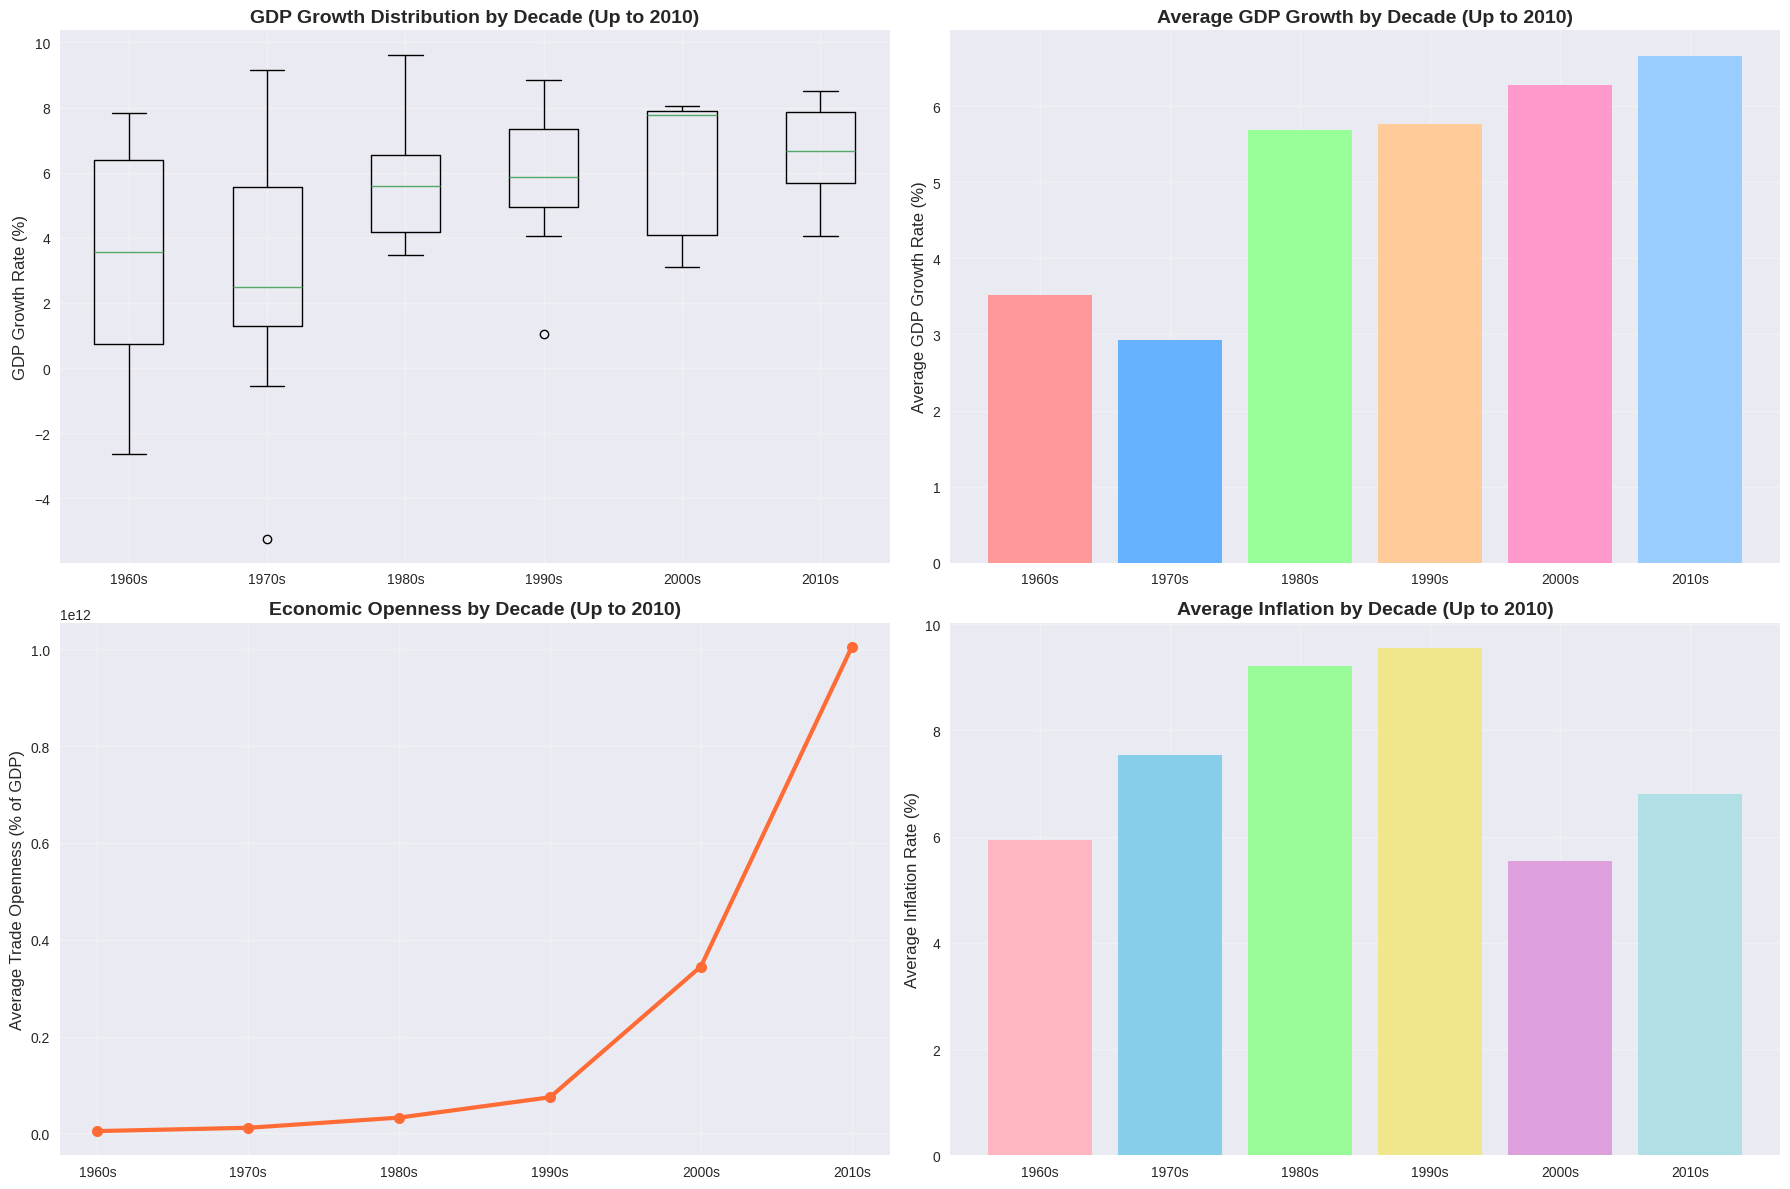

In [64]:
# Filter data to include only decades up to 2010
df_filtered = df[df['Decade'] <= 2010].copy()

# Create decade-wise comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# GDP Growth by Decade
df_decades = df_filtered.groupby('Decade').agg({
    'GDP growth (annual %)': ['mean', 'std', 'min', 'max'],
    'Inflation, consumer prices (annual %)': ['mean', 'std'],
    'GDP per capita (current US$)': ['mean', 'max'],
    'Economic Openness (in USD)': 'mean'
}).round(2)

# Box plot for GDP growth by decade
decade_groups = [df_filtered[df_filtered['Decade'] == d]['GDP growth (annual %)'].dropna() 
                for d in sorted(df_filtered['Decade'].unique())]
ax1.boxplot(decade_groups, tick_labels=[f"{int(d)}s" for d in sorted(df_filtered['Decade'].unique())])
ax1.set_title('GDP Growth Distribution by Decade (Up to 2010)', fontsize=14, fontweight='bold')
ax1.set_ylabel('GDP Growth Rate (%)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Average GDP growth by decade
decades_sorted = sorted(df_filtered['Decade'].unique())
avg_growth = [df_filtered[df_filtered['Decade'] == d]['GDP growth (annual %)'].mean() for d in decades_sorted]
ax2.bar([f"{int(d)}s" for d in decades_sorted], avg_growth, 
        color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF'][:len(decades_sorted)])
ax2.set_title('Average GDP Growth by Decade (Up to 2010)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average GDP Growth Rate (%)', fontsize=12)
ax2.grid(True, alpha=0.3)

# Economic Openness Evolution
avg_openness = [df_filtered[df_filtered['Decade'] == d]['Economic Openness (in USD)'].mean() for d in decades_sorted]
ax3.plot([f"{int(d)}s" for d in decades_sorted], avg_openness, 
         marker='o', linewidth=3, markersize=8, color='#FF6B35')
ax3.set_title('Economic Openness by Decade (Up to 2010)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Average Trade Openness (% of GDP)', fontsize=12)
ax3.grid(True, alpha=0.3)

# Inflation trends by decade
avg_inflation = [df_filtered[df_filtered['Decade'] == d]['Inflation, consumer prices (annual %)'].mean() for d in decades_sorted]
ax4.bar([f"{int(d)}s" for d in decades_sorted], avg_inflation,
        color=['#FFB6C1', '#87CEEB', '#98FB98', '#F0E68C', '#DDA0DD', '#B0E0E6'][:len(decades_sorted)])
ax4.set_title('Average Inflation by Decade (Up to 2010)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Average Inflation Rate (%)', fontsize=12)
ax4.grid(True, alpha=0.3)

plt.savefig('Comparitive analysis', dpi=300)
plt.tight_layout()
plt.show()

## Crisis Impact Analysis

Before/after comparison charts for major economic events (1965 war, 1991 crisis, 2008 crisis, 2020 pandemic)

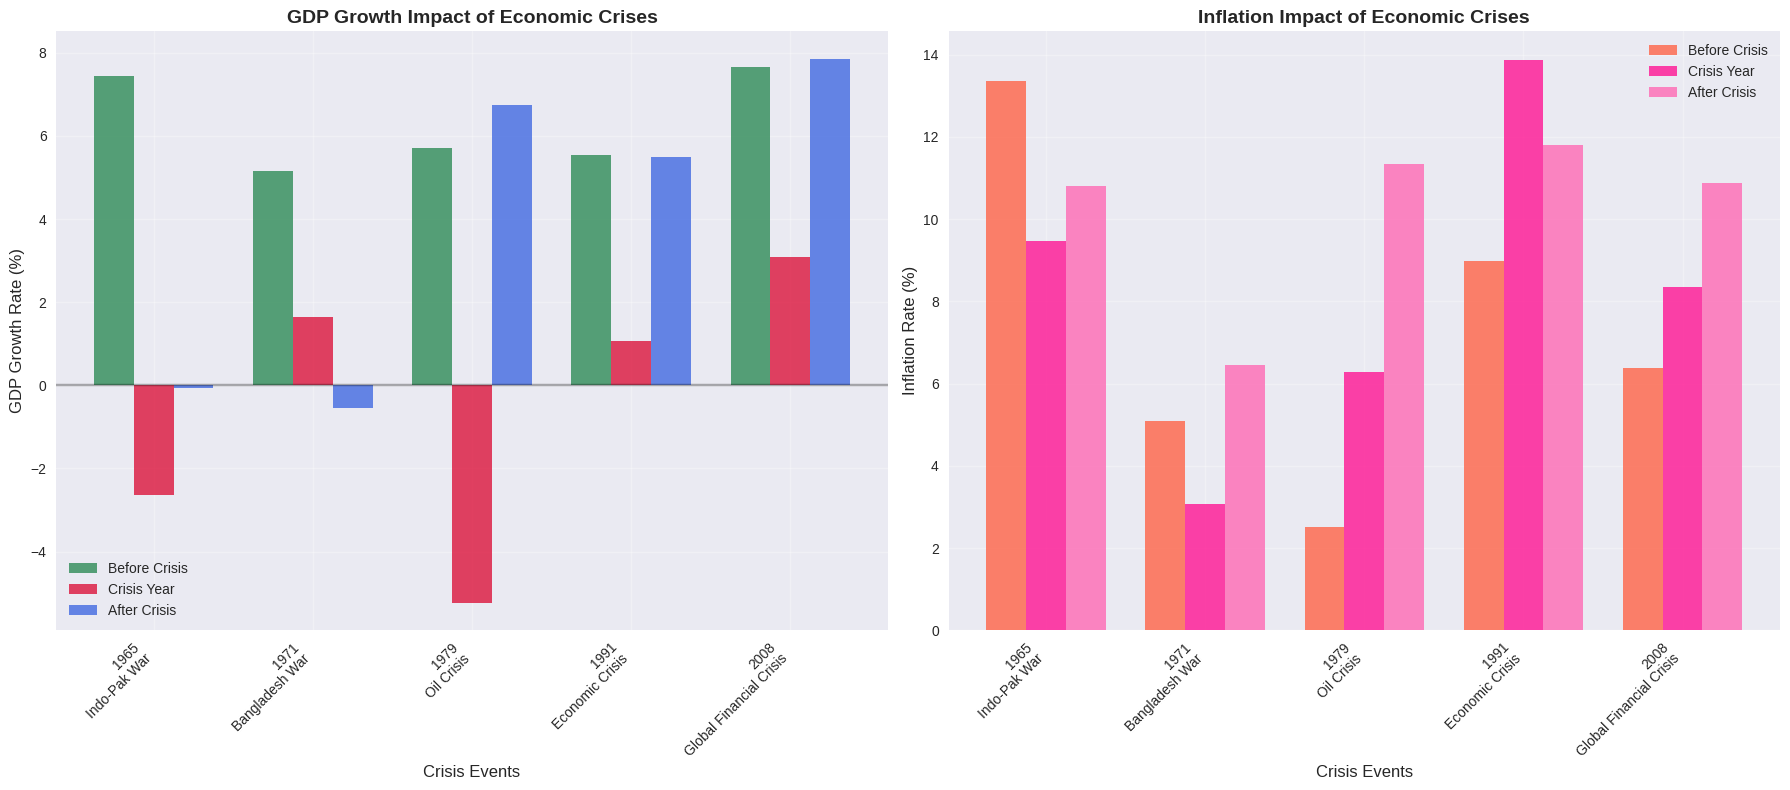

In [65]:
crisis_analysis = {}
for year, event in crisis_years.items():
    if year in df['Year'].values:
        before_year = year - 1 if year - 1 in df['Year'].values else year - 2
        after_year = year + 1 if year + 1 in df['Year'].values else year + 2
        
        before_data = df[df['Year'] == before_year].iloc[0] if before_year in df['Year'].values else None
        crisis_data = df[df['Year'] == year].iloc[0]
        after_data = df[df['Year'] == after_year].iloc[0] if after_year in df['Year'].values else None
        
        if before_data is not None and after_data is not None:
            crisis_analysis[year] = {
                'event': event,
                'gdp_growth_before': before_data['GDP growth (annual %)'],
                'gdp_growth_crisis': crisis_data['GDP growth (annual %)'],
                'gdp_growth_after': after_data['GDP growth (annual %)'],
                'inflation_before': before_data['Inflation, consumer prices (annual %)'],
                'inflation_crisis': crisis_data['Inflation, consumer prices (annual %)'],
                'inflation_after': after_data['Inflation, consumer prices (annual %)']
            }

# Create crisis impact visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# GDP Growth Impact
crisis_years_list = list(crisis_analysis.keys())
gdp_before = [crisis_analysis[year]['gdp_growth_before'] for year in crisis_years_list]
gdp_crisis = [crisis_analysis[year]['gdp_growth_crisis'] for year in crisis_years_list]
gdp_after = [crisis_analysis[year]['gdp_growth_after'] for year in crisis_years_list]

x = np.arange(len(crisis_years_list))
width = 0.25

ax1.bar(x - width, gdp_before, width, label='Before Crisis', color='#2E8B57', alpha=0.8)
ax1.bar(x, gdp_crisis, width, label='Crisis Year', color='#DC143C', alpha=0.8)
ax1.bar(x + width, gdp_after, width, label='After Crisis', color='#4169E1', alpha=0.8)

ax1.set_xlabel('Crisis Events', fontsize=12)
ax1.set_ylabel('GDP Growth Rate (%)', fontsize=12)
ax1.set_title('GDP Growth Impact of Economic Crises', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels([f"{year}\n{crisis_analysis[year]['event']}" for year in crisis_years_list], 
                    rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Inflation Impact
inflation_before = [crisis_analysis[year]['inflation_before'] for year in crisis_years_list]
inflation_crisis = [crisis_analysis[year]['inflation_crisis'] for year in crisis_years_list]
inflation_after = [crisis_analysis[year]['inflation_after'] for year in crisis_years_list]

ax2.bar(x - width, inflation_before, width, label='Before Crisis', color='#FF6347', alpha=0.8)
ax2.bar(x, inflation_crisis, width, label='Crisis Year', color='#FF1493', alpha=0.8)
ax2.bar(x + width, inflation_after, width, label='After Crisis', color='#FF69B4', alpha=0.8)

ax2.set_xlabel('Crisis Events', fontsize=12)
ax2.set_ylabel('Inflation Rate (%)', fontsize=12)
ax2.set_title('Inflation Impact of Economic Crises', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([f"{year}\n{crisis_analysis[year]['event']}" for year in crisis_years_list], 
                    rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()